웃는 얼굴과 웃지 않는 얼굴 구별하기

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
from google.colab import files # 데이터 불러오기

%cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [17]:
!pwd

/content/drive/MyDrive/data


In [18]:
# pwd 는 현재 폴더 확인
# cd 폴더 이름: 폴더(directroy)로 옮기기
# cd .. 현재 있는 폴더에서 현재 폴더를 포함하는 더 큰 폴더로 이동합니다.
# cd / 아예 가장 큰 폴더 (root directory)로 이동합니다.

Text(0.5, 1.0, 'Baby')

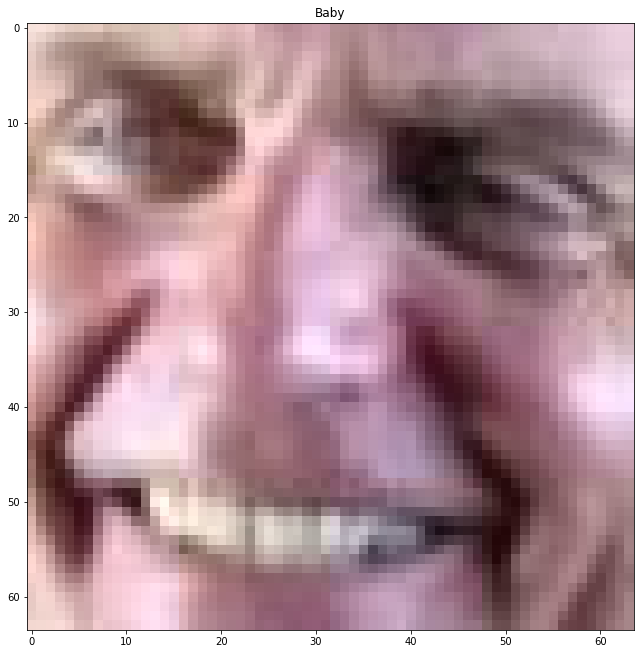

In [19]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

image_sample= imread('smile/James_Jones_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('Baby')
#ax.axis('off');

Text(0.5, 1.0, 'Adult')

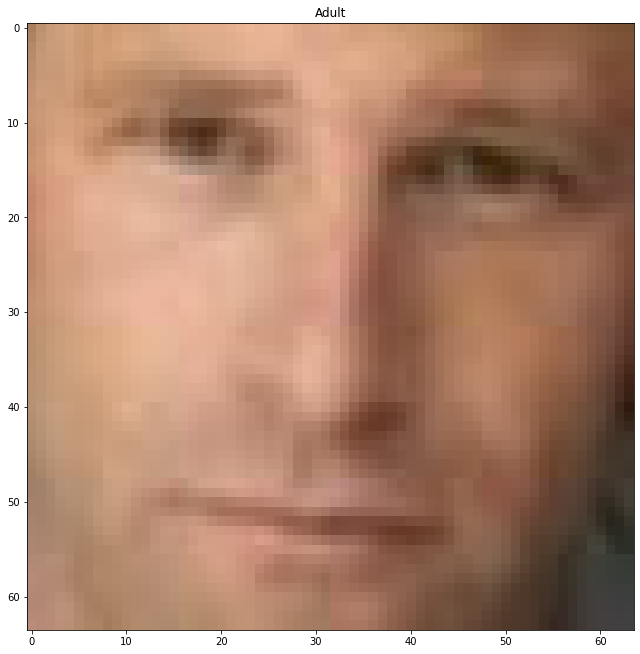

In [20]:
image_sample2= imread('non_smile/Aaron_Eckhart_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample2, ax=ax)
ax.set_title('Adult')

In [21]:
image_sample2.shape

(64, 64, 3)

In [22]:
#root directory에서 시작

In [23]:
cd /

/


In [24]:
# ImageDataGenerator의 flow_from_directory를 사용하여 directory로 데이터를 입력

from keras.preprocessing.image import ImageDataGenerator

from keras import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [25]:
# ImageDataGenerator는 픽셀의 컬러 혹은 흑백값을 0에서 255를 0과 1사이로 바꾸어 줍니다. 이것은 필수입니다.
# ImageDataGenerator는 여러가지 옵션으로 사진의 갯수를 늘릴 수 있습니다.


# 아래는 train data에게 적용되는 옵션입니다.

smile_gen = ImageDataGenerator(
        rescale=1./255,         # 픽셀 값을 0~1 범위로 변환 ## 이것은 사실상 필수 사항입니다.
        rotation_range=40,      # 40도까지 회전
        width_shift_range=0.2,  # 20%까지 좌우 이동
        height_shift_range=0.2, # 20%까지 상하 이동
        shear_range=0.2,        # 20%까지 기울임
        zoom_range=0.2,         # 20%까지 확대
        horizontal_flip=True,   # 좌우 뒤집기
    )

In [28]:
### 각각 폴더에서 온 것을 [1,0]과 [0,1]를 정답으로 해서 불러옵니다.

smile_data = smile_gen.flow_from_directory(directory='/content/drive/MyDrive/data',
                                              target_size=(160, 185),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize, 사이즈를 원하는 모양으로 조절이 가능해요.
                                              color_mode='rgb',       # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
                                              class_mode='binary', # class_mode='binary',
                                              batch_size=20,
                                              shuffle=True)

Found 1203 images belonging to 2 classes.


In [29]:
# 컨볼루션 신경망의 설정
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(160, 185, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
### [1,0]과 [0,1]이므로 위와 같이 했습니다.
### 만약 위에서 class_mode='binary'설정했다면, Dense(1,activation='sigmoid' )가 되여야 하고, 아래 compile을 loss=' binary_crossentropy'해야 합니다.

In [30]:
# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['binary_crossentropy'])

model.fit_generator(smile_data, epochs=5 )

<ipython-input-30-100869f6d076>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(smile_data, epochs=5 )


Epoch 1/5
61/61 [==============================] - 167s 3s/step - loss: 0.0000e+00 - binary_crossentropy: 563798.0000
Epoch 2/5
61/61 [==============================] - 162s 3s/step - loss: 0.0000e+00 - binary_crossentropy: 29987916.0000
Epoch 3/5
61/61 [==============================] - 155s 3s/step - loss: 0.0000e+00 - binary_crossentropy: 333246016.0000
Epoch 4/5
61/61 [==============================] - 159s 3s/step - loss: 0.0000e+00 - binary_crossentropy: 1555754752.0000
Epoch 5/5
61/61 [==============================] - 164s 3s/step - loss: 0.0000e+00 - binary_crossentropy: 4831451648.0000
